**TREEEMAP**
***

In [2]:
# libraries
import matplotlib.pyplot as plt
import squarify 
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('Sample_db.csv')

In [4]:
def rgb_to_hex(rgb):
    return '#'+'%02x%02x%02x' % rgb

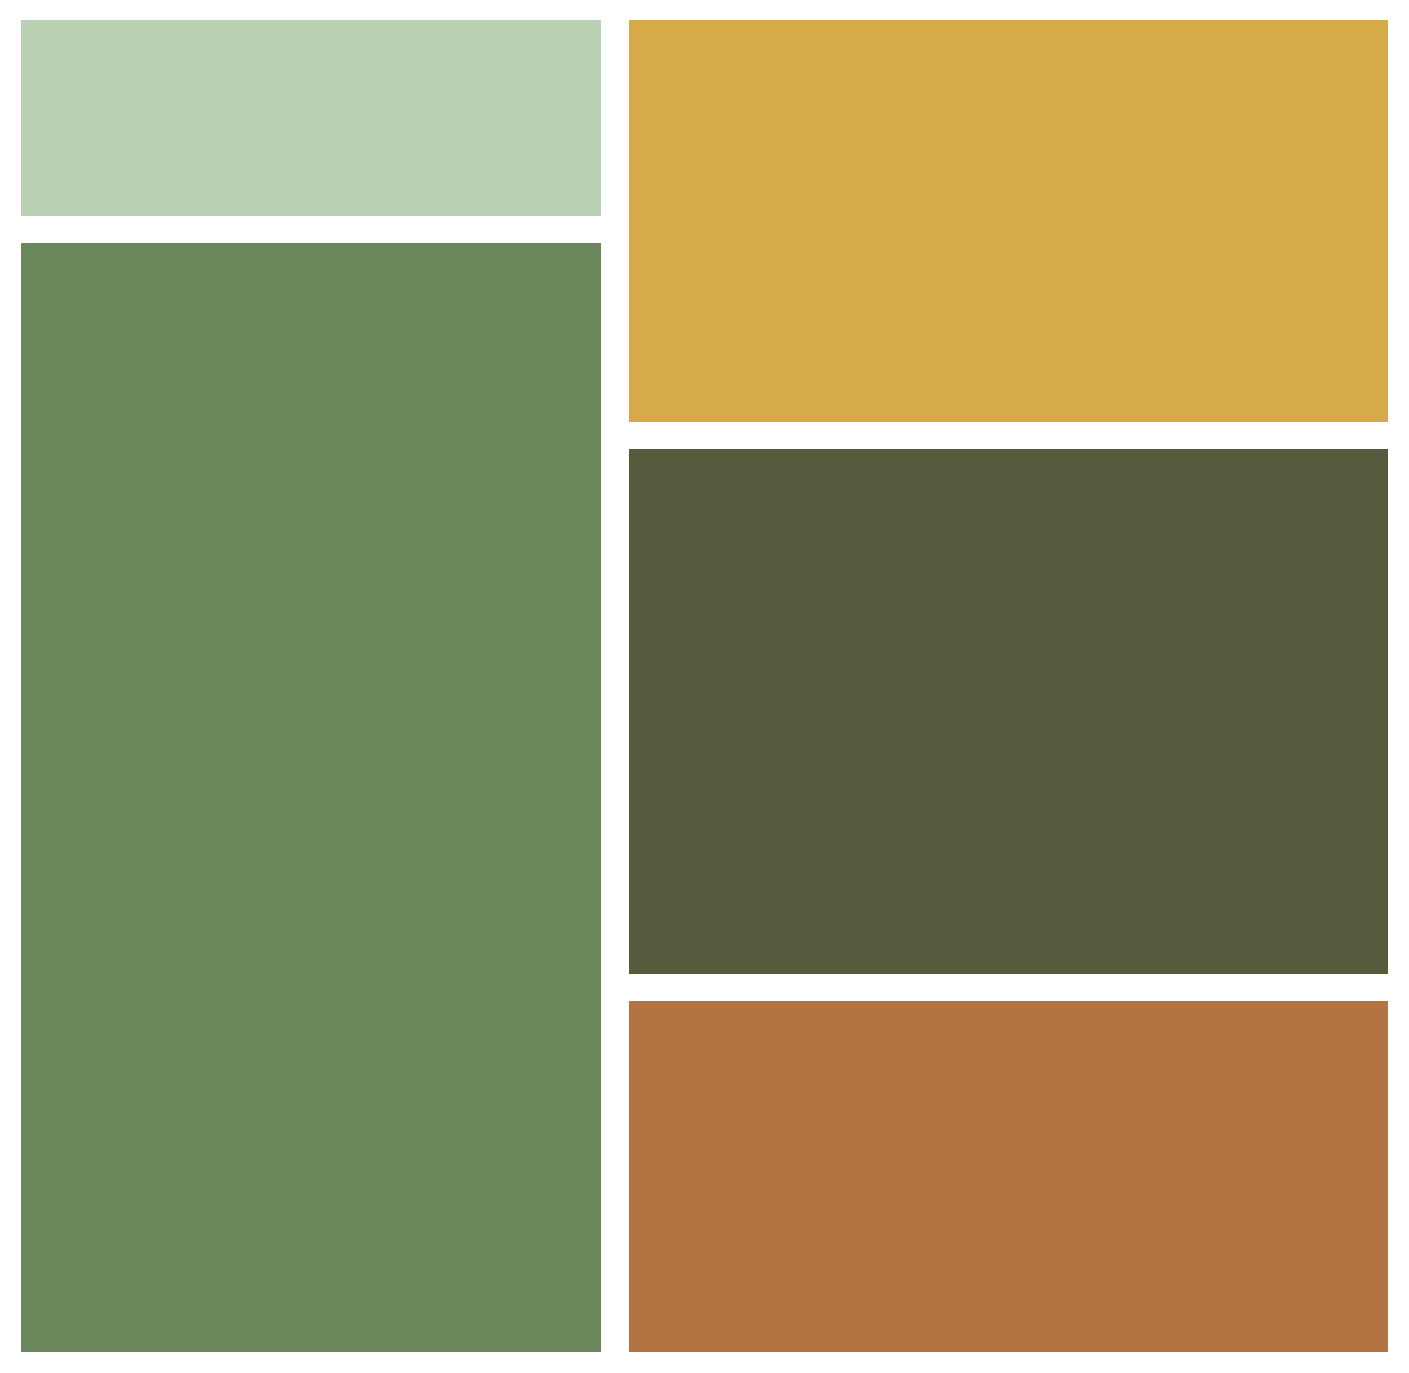

In [5]:
val = 98494
colors = [(data.iloc[val][f'c{i}_r'],data.iloc[val][f'c{i}_g'],data.iloc[val][f'c{i}_b']) for i in range(1,6)]  

plt.rcParams["figure.figsize"] = (25,25)
squarify.plot(sizes=list(data.iloc[val,20:25]), 
#               label=list(data.iloc[val,25:]), # To enable labels un-comment this
              color=colors, 
              pad=True,
              text_kwargs=dict(color='white', 
                               alpha=1,
                               fontweight=1000,
                               fontsize='xx-large'
                               ))
plt.axis('off')
plt.show()

**Custom Function**
***

In [6]:
def x_center(text,x):
    # get coords based on boundary
    return int((x - cv2.getTextSize(text, 3, 1, 1)[0][0]) / 2)

In [7]:
def prep_data(data):
    colors = [tuple(map(int, data[f'rgb_{i}'][1:-1].replace('.0','').split(', '))) for i in range(1,6)]
    line_df = pd.DataFrame([colors, list(data.iloc[20:25])]).T
    line_df.columns = ['color', 'dense']
    return line_df.sort_values(by=['dense'], ascending=False)

In [11]:
def beauty_palette(line_df, H = 2000,W = 1500, verbose = False, color = (100,100,100), k=280, y_offset=125, b_offset=250, bar_adj = 35):
    
    # k, offset constant
    # Small offset boxes
    # Big offset boxes
    
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt 

    plt.rcParams["figure.figsize"] = (25,25)
    whiteblankimage = 255 * np.ones(shape=[H, W, 3], dtype=np.uint8)

    # x axis startingpoint
    # y axis startingpoint
    x=int(W/2)
    y=int(H/4)
    
    cv2.rectangle(whiteblankimage, pt1=(x-b_offset,y-y_offset), pt2=(x+b_offset,y+y_offset), color=line_df.color.values[0], thickness=-1)
    cv2.rectangle(whiteblankimage, pt1=(x-y_offset,y+k-y_offset), pt2=(x+y_offset,y+k+y_offset), color=	line_df.color.values[1], thickness=-1)
    cv2.rectangle(whiteblankimage, pt1=(x-k-y_offset,y+k-y_offset), pt2=(x-k+y_offset,y+k+y_offset), color=line_df.color.values[2], thickness=-1)
    cv2.rectangle(whiteblankimage, pt1=(x+k-y_offset,y+k-y_offset), pt2=(x+k+y_offset,y+k+y_offset), color=line_df.color.values[3], thickness=-1)
    cv2.rectangle(whiteblankimage, pt1=(x-b_offset,y+2*k-y_offset), pt2=(x+b_offset,y+2*k+y_offset), color=line_df.color.values[4], thickness=-1)
    


    if verbose and (H==2000) and (W==1500):
        HT = int((y+2*k+y_offset)+(H-(y+2*k+y_offset))/2)
        cv2.putText(whiteblankimage, str(line_df.color.values[0])[1:-1], (x_center(str(line_df.color.values[0]),W), HT-75), 3, 1, color, 1, cv2.LINE_8) 
        cv2.putText(whiteblankimage, str(line_df.color.values[1])[1:-1], (x_center(str(line_df.color.values[1]),W), HT), 3, 1, color, 1, cv2.LINE_8) 
        cv2.putText(whiteblankimage, str(line_df.color.values[2])[1:-1], (x_center(str(line_df.color.values[2]),W)-k, HT), 3, 1, color, 1, cv2.LINE_8) 
        cv2.putText(whiteblankimage, str(line_df.color.values[3])[1:-1], (x_center(str(line_df.color.values[3]),W)+k, HT), 3, 1, color, 1, cv2.LINE_8) 
        cv2.putText(whiteblankimage, str(line_df.color.values[4])[1:-1], (x_center(str(line_df.color.values[4]),W), HT+75), 3, 1, color, 1, cv2.LINE_8) 

        offset_t = int(H*0.025)
        offset_t_inferior = int(offset_t*(3/5))
        bar_l = int(offset_t*.8)
        Hsep = HT-offset_t+((HT-offset_t_inferior)-(HT-offset_t))
        
        cv2.line(whiteblankimage,(int(W/4)-bar_adj,HT-offset_t),(int(W/4)*3,HT-offset_t),color, 1)
        cv2.line(whiteblankimage,(int(W/4)-bar_adj,HT+offset_t_inferior),(int(W/4)*3,HT+offset_t_inferior),color, 1)
        cv2.line(whiteblankimage,(615,Hsep+bar_l),(615,Hsep),color, 1)
        cv2.line(whiteblankimage,(855,Hsep+bar_l),(855,Hsep),color, 1)

        plt.axis('off')
    plt.imshow(whiteblankimage)
    plt.show()

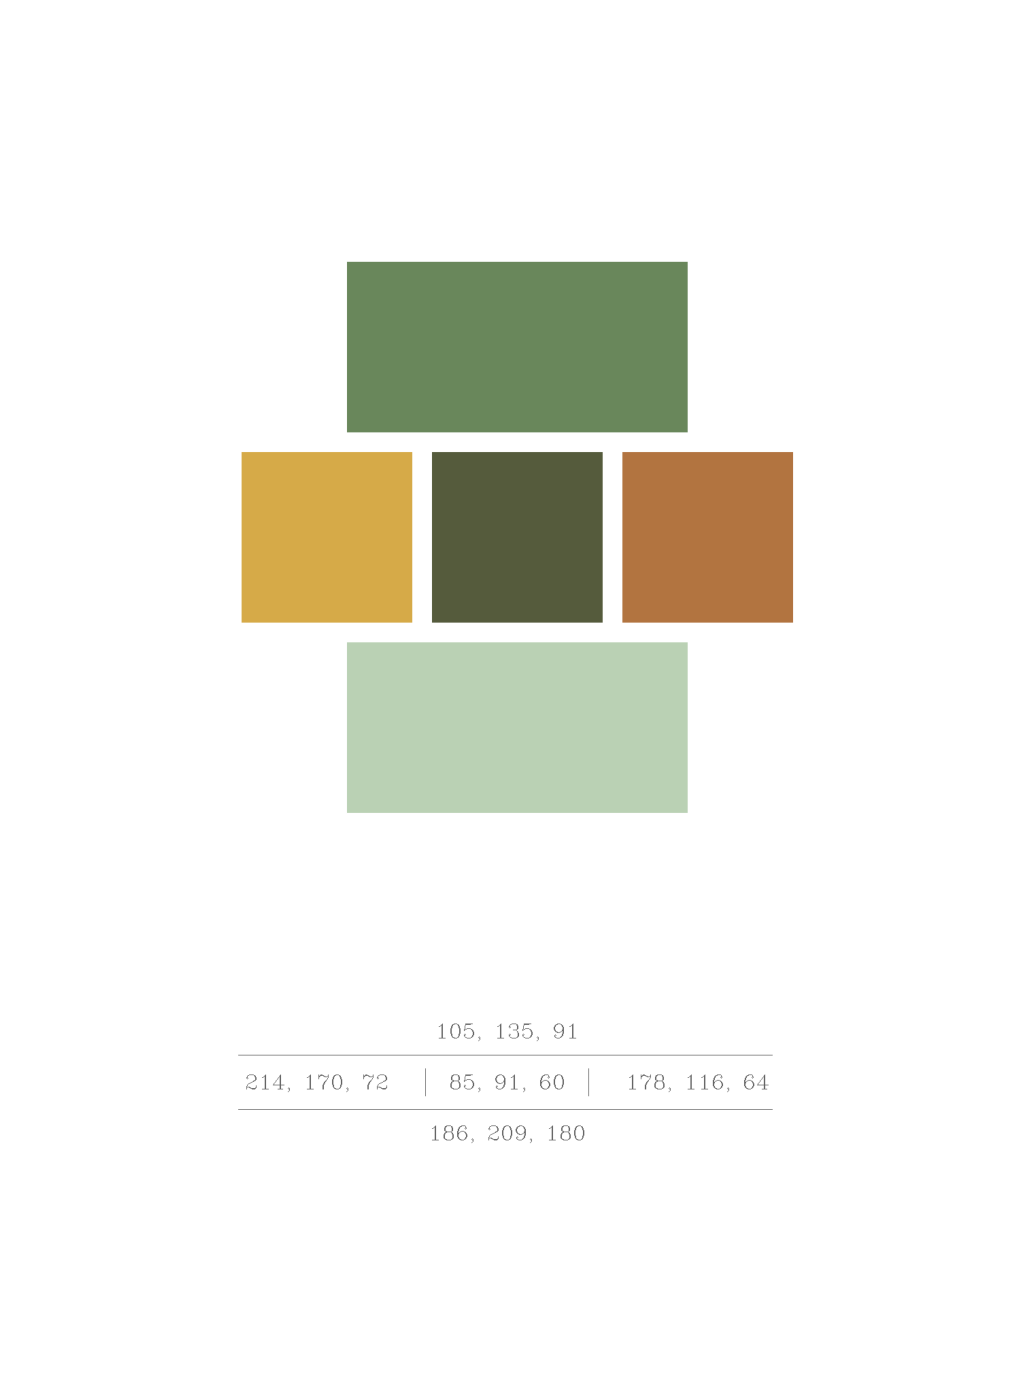

In [13]:
import cv2

# data = pd.read_csv('Sample_db.csv')
val = 98494
beauty_palette(prep_data(data.iloc[val]), verbose = True)